# IRF - Uppsala Python Workshop: Snakes in Space 🐍
author: Louis Richard
e-mail: louisr@irfu.se
date: 29/02/2024

## Python for data analysis:
- Numpy (https://numpy.org/doc/stable/index.html, https://numpy.org/doc/stable/user/numpy-for-matlab-users.html)
- Matplotlib (https://matplotlib.org/stable/tutorials/pyplot.html)
- Scipy (https://docs.scipy.org/doc/scipy/index.html)
- Jupyter (https://jupyter.org/)
These three modules are not included by default with python and will need to be installed somehow.  `pip install numpy matplotlib scipy jupyterlab`, for example

## Numpy

In [3]:
import numpy as np  # convention, shorter, saves writing numpy all the time

### Create an array
numpy provides n-dimensional arrays, implemented at low-level for efficiency

In [4]:
my_array = np.random.random((3, 3))

# We can do maths directly with them
something_new = 5.0 * np.sin(my_array)**2.

# There are many ways to create them.
another_array = np.zeros_like(my_array)
a_range = np.linspace(0., 1., 64)
another_range = np.arange(-1., 1., 0.1)

my_array

array([[0.68720491, 0.02160391, 0.19132715],
       [0.86607217, 0.62693907, 0.53452819],
       [0.62397279, 0.41653496, 0.52130118]])

In [5]:
my_array.astype(np.float32)

array([[0.6872049 , 0.02160391, 0.19132715],
       [0.8660722 , 0.62693906, 0.5345282 ],
       [0.6239728 , 0.41653496, 0.5213012 ]], dtype=float32)

In [6]:
my_array.astype(np.float64) 

array([[0.68720491, 0.02160391, 0.19132715],
       [0.86607217, 0.62693907, 0.53452819],
       [0.62397279, 0.41653496, 0.52130118]])

In [7]:
# Numpy arrays, like everything else, are objects, and have methods and attributes
print(f"{my_array.std() = }")
print(f"Number of dimensions = {my_array.ndim}, shape = {my_array.shape}")

my_array.std() = 0.24341987094084908
Number of dimensions = 2, shape = (3, 3)


**Broadcasting** rules applied to numerical operations on ndarrays. Length-1 dimensions get expanded in e.g. element-by-element multiplication.

https://numpy.org/doc/stable/user/basics.broadcasting.html

In [8]:


# You might want to check the shapes of these things to understand what is going on. 
id_matrix = np.identity(3)
scalar = 3. + 1.0j
vec = np.random.randn(8).reshape((8,1,1))

(my_array * vec[:,...] * id_matrix + scalar).shape

(8, 3, 3)

### Array slicing
To extract / set parts of an array, re-order, re-shape.  But, such operations (generally) create only a "view" of the original array, not a deep copy!


In [9]:
# What happens here?
new_array = my_array 
new_array = new_array[::-1, :]
new_array[1, 1] = 50
print(new_array)
print(my_array)

[[6.23972786e-01 4.16534960e-01 5.21301184e-01]
 [8.66072173e-01 5.00000000e+01 5.34528193e-01]
 [6.87204910e-01 2.16039112e-02 1.91327150e-01]]
[[6.87204910e-01 2.16039112e-02 1.91327150e-01]
 [8.66072173e-01 5.00000000e+01 5.34528193e-01]
 [6.23972786e-01 4.16534960e-01 5.21301184e-01]]


In [10]:
copy_array = my_array.copy() 
copy_array = copy_array[::-1, :]
copy_array[1, 1] = 10
print(copy_array, my_array)


[[ 0.62397279  0.41653496  0.52130118]
 [ 0.86607217 10.          0.53452819]
 [ 0.68720491  0.02160391  0.19132715]] [[6.87204910e-01 2.16039112e-02 1.91327150e-01]
 [8.66072173e-01 5.00000000e+01 5.34528193e-01]
 [6.23972786e-01 4.16534960e-01 5.21301184e-01]]


In [11]:
# Using "where" to search and index 
my_array = np.random.random((3, 3))
inx = np.where(my_array > 0.5)
my_array[inx] = np.nan
print(my_array)

[[0.07861686 0.1015088  0.23999359]
 [0.05828127        nan 0.06772143]
 [0.30369322        nan        nan]]


In [12]:
inx = np.isnan(my_array)
my_array[inx] = -1e99
my_array

array([[ 7.86168622e-02,  1.01508796e-01,  2.39993594e-01],
       [ 5.82812690e-02, -1.00000000e+99,  6.77214341e-02],
       [ 3.03693224e-01, -1.00000000e+99, -1.00000000e+99]])

### Operating on arrays

In [13]:
theta = np.deg2rad(30)
vec = np.array([1, 1, 1])
mat = np.array([
    [np.cos(theta), np.sin(theta), 0], 
    [-np.sin(theta), np.cos(theta), 0], 
    [0, 0, 1]])

# Applies the broadcasting rules
mat * vec

array([[ 0.8660254,  0.5      ,  0.       ],
       [-0.5      ,  0.8660254,  0.       ],
       [ 0.       ,  0.       ,  1.       ]])

In [14]:
np.matmul(mat, vec)

array([1.3660254, 0.3660254, 1.       ])

In [15]:
r_mat = np.stack([np.array([[np.cos(theta), np.sin(theta), 0], [-np.sin(theta), np.cos(theta), 0], [0, 0, 1]]) for theta in np.random.rand(100)])

In [16]:
b = [1, 0, 0] * np.ones((100, 3))

In [17]:
m = np.random.rand(100, 3, 4, 5, 6, 8)
print(m[0, :, :, :, :, :].shape)
print(m[0].shape)
print(m[0, ...].shape)
print(m[..., 0].shape)
print(m[..., 0, :, :].shape)

(3, 4, 5, 6, 8)
(3, 4, 5, 6, 8)
(3, 4, 5, 6, 8)
(100, 3, 4, 5, 6)
(100, 3, 4, 6, 8)


In [18]:
np.matmul(r_mat[0, ...], b[0, :])

array([ 0.63268939, -0.77440567,  0.        ])

In [19]:
r_mat_b = np.matmul(r_mat, b[..., None])
print(r_mat.shape, b.shape, r_mat_b.shape)

(100, 3, 3) (100, 3) (100, 3, 1)


### datetime64
Python by default has the `datetime` module.  Within `numpy`, there is an implementation that can be used in array operations, `datetime64`.

In [20]:
# A time string
"2017-08-07T00:00:00.000000000"

'2017-08-07T00:00:00.000000000'

In [21]:
np.datetime64("2017-08-07T00:00:00.000000000").astype("datetime64[ns]")
np.datetime64("2017-08-07T00:00:00.000000000").astype("datetime64[Y]")

numpy.datetime64('2017')

In [22]:
# But note, not leap-second aware!
np.datetime64(0 , "ns")
np.datetime64(int(1e9 * 365.25 * 86400 * 54), "ns")

numpy.datetime64('2024-01-01T12:00:00.000000000')

In [23]:
# Arithmetic is done also using timedelta64 objects:
one_second = np.timedelta64(1, 's')
time_j2000 = np.datetime64("2000-01-01T12:00:00.0000")
time = np.datetime64("2024-01-01T12:00:00.0000")
dt = time - time_j2000
elapsed_seconds = int(dt / one_second)
print(f"{elapsed_seconds} seconds between {time_j2000} and {time}")
print(f"But note, {int(elapsed_seconds % (365.25 * 86400))} leapseconds")

757382400 seconds between 2000-01-01T12:00:00.000000 and 2024-01-01T12:00:00.000000
But note, 0 leapseconds


In [48]:
#  An array of times
tarr = np.linspace(0., 60., 512) * np.timedelta64(1,"s") + np.datetime64("2024-01-01T00:00:00.000000000")
print(tarr[:2])

['2024-01-01T00:00:00.000000000' '2024-01-01T00:00:00.000000000']


---
## Matplotlib
Plotting library, heavily inspired by matlab (or, whatever matlab was like >>10 years ago)


https://matplotlib.org/stable/gallery/index.html

In [25]:
# For interactive use inside a notebook:
%matplotlib widget 
import matplotlib.pyplot as plt  # The most matlab-like interface to matplotlib

Text(0.5, 0, 'X')

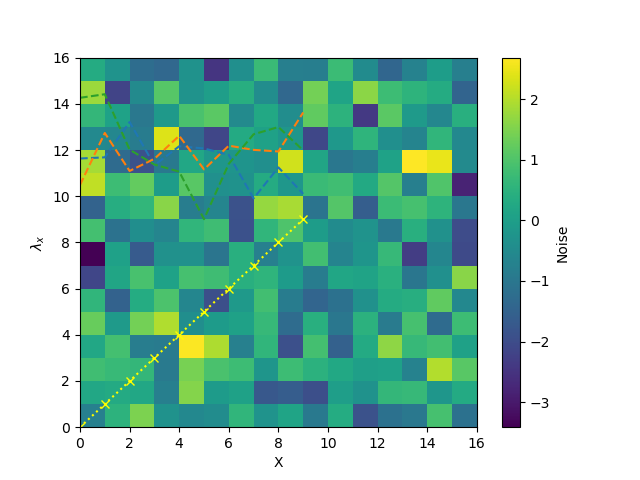

In [33]:
fig = plt.figure()
plt.plot(np.arange(10), marker = 'x', linestyle=":", color='yellow')
plt.plot(np.arange(10), np.random.randn(10,3) + 12, linestyle="--")
plt.pcolormesh(np.random.randn(16*16).reshape(16,16))
plt.colorbar().set_label("Noise")
plt.ylabel(r"$\lambda_x$")
plt.xlabel("X")

# plt.savefig("something.pdf")
# plt.savefig("something.png", dpi=300)

[0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 1.0e+09 1.0e+09 1.0e+09 1.0e+09 1.0e+09 1.0e+09 1.0e+09 1.0e+09 1.0e+09
 2.0e+09 2.0e+09 2.0e+09 2.0e+09 2.0e+09 2.0e+09 2.0e+09 2.0e+09 3.0e+09
 3.0e+09 3.0e+09 3.0e+09 3.0e+09 3.0e+09 3.0e+09 3.0e+09 3.0e+09 4.0e+09
 4.0e+09 4.0e+09 4.0e+09 4.0e+09 4.0e+09 4.0e+09 4.0e+09 5.0e+09 5.0e+09
 5.0e+09 5.0e+09 5.0e+09 5.0e+09 5.0e+09 5.0e+09 5.0e+09 6.0e+09 6.0e+09
 6.0e+09 6.0e+09 6.0e+09 6.0e+09 6.0e+09 6.0e+09 7.0e+09 7.0e+09 7.0e+09
 7.0e+09 7.0e+09 7.0e+09 7.0e+09 7.0e+09 7.0e+09 8.0e+09 8.0e+09 8.0e+09
 8.0e+09 8.0e+09 8.0e+09 8.0e+09 8.0e+09 9.0e+09 9.0e+09 9.0e+09 9.0e+09
 9.0e+09 9.0e+09 9.0e+09 9.0e+09 9.0e+09 1.0e+10 1.0e+10 1.0e+10 1.0e+10
 1.0e+10 1.0e+10 1.0e+10 1.0e+10 1.1e+10 1.1e+10 1.1e+10 1.1e+10 1.1e+10
 1.1e+10 1.1e+10 1.1e+10 1.1e+10 1.2e+10 1.2e+10 1.2e+10 1.2e+10 1.2e+10
 1.2e+10 1.2e+10 1.2e+10 1.3e+10 1.3e+10 1.3e+10 1.3e+10 1.3e+10 1.3e+10
 1.3e+10 1.3e+10 1.3e+10 1.4e+10 1.4e+10 1.4e+10 1.

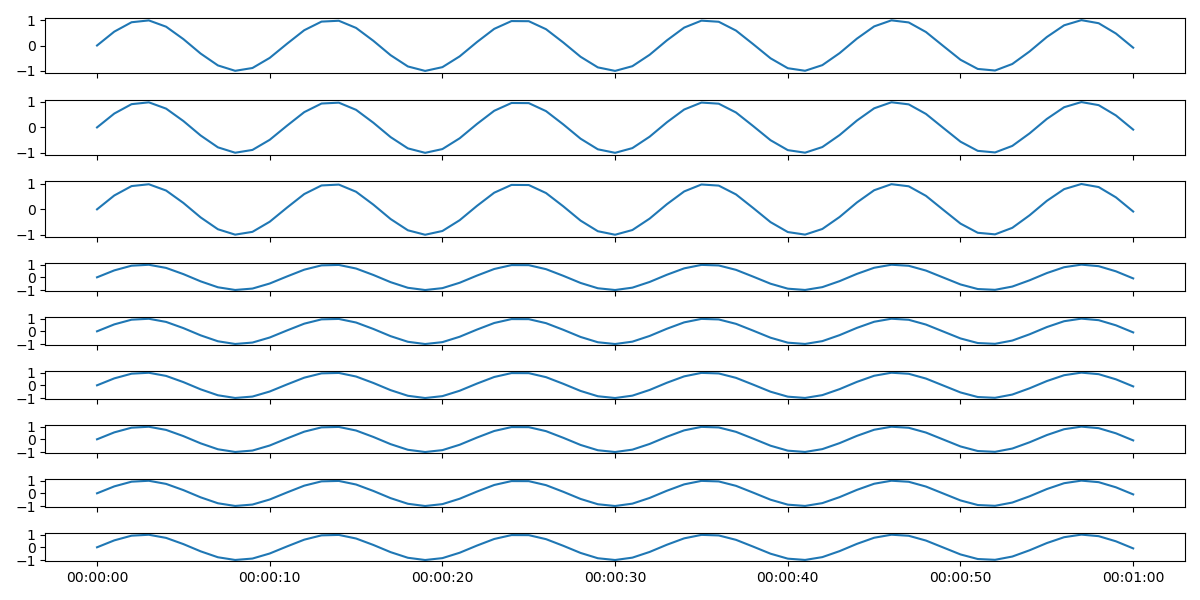

In [53]:
# A more space-physics example
ratios = [1. for x in range(9)]
ratios[:3] = 2., 2.,  2.
fig, axs = plt.subplots(len(ratios),1, sharex=True, figsize=(12,6), gridspec_kw=dict(height_ratios=ratios))

for ax in axs:
    plt.sca(ax)
    vals = (tarr - tarr[0])/np.timedelta64(1,"ns")
    print(vals)
    plt.plot(tarr, np.sin(vals))
plt.tight_layout()


![Anatomy of a figure](https://matplotlib.org/stable/_images/sphx_glr_anatomy_001_2_00x.png)

---
## SciPy
A comprehensive package for data analysis...
https://docs.scipy.org/doc/scipy/tutorial/index.html

In [27]:
from scipy.io import loadmat # To handle .mat files from matlab, for example
from scipy.signal import welch

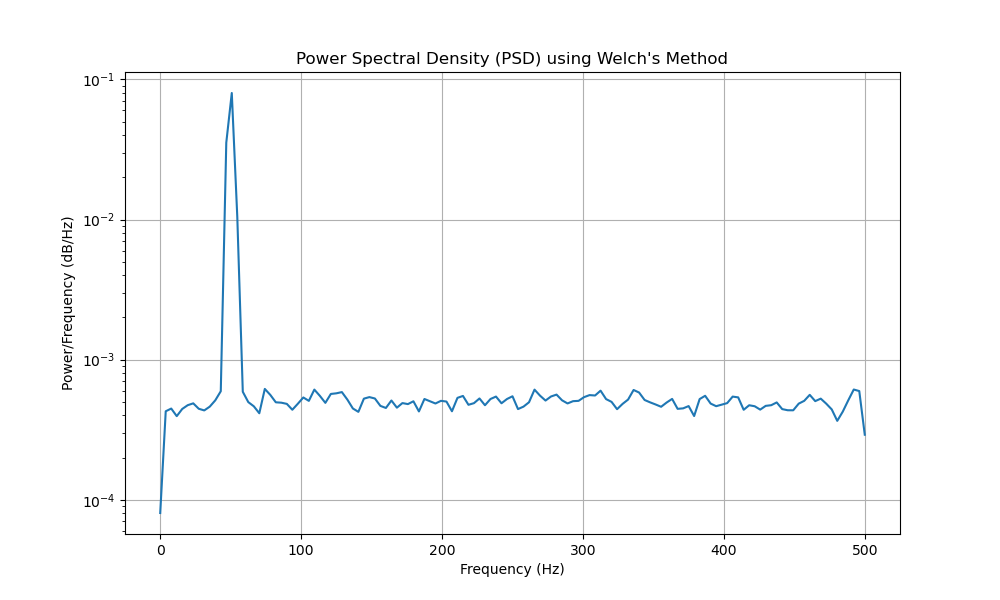

In [28]:
#  An example, putting all the above together:

# Generate a sample signal (sine wave with noise)
fs = 1000  # Sampling frequency
t = np.arange(0, 10, 1/fs)  # Time vector from 0 to 10 seconds
f1 = 50  # Frequency of the sine wave
signal = np.sin(2*np.pi*f1*t) + 0.5*np.random.randn(len(t))  # Signal with added noise

# Compute the Power Spectral Density (PSD) using Welch's method
frequencies, psd = welch(signal, fs=fs, nperseg=256)

# Plot the PSD
plt.figure(figsize=(10, 6))
plt.semilogy(frequencies, psd)
plt.title('Power Spectral Density (PSD) using Welch\'s Method')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.grid(True)
plt.show()